# Do Your Startup’s Location and Sector of Operation Determine Its Venture Capital Funding?

## Project One

### Introduction

The startup world, which emerged primarily in the United States with the rise of Silicon Valley in 1970s, has seen rapid growth in the past three decades, particularly after the dot.com boom in 1990s (Patel, 2022). While the US remains home to the largest number of startups, today, entrepreneurs across the world are inspired to launch startups that take over traditional practices in a wide variety of industries. In fact, many have already done so, and advanced their startups to witness M&As and IPOs.  However, this is only the case for a very small fraction of startups – only 1 out 10 startups succeed, with more than 20% of startups not surviving longer than a year (Patel, 2022). 

While success is primarily attributable to precise marketing, product development, successful R&D and strong management, access to sufficient funding is perhaps the most vital factor determining whether a young startup survives. Venture capital funding in particular is a major source of funding in the early stages, and their yearly investments exceed $100B in the United States alone. Although the aforementioned signals of success are theoretically the most important factors in attracting funding for startups, systematic differences in fundings could also exist amongst different classifications of startups. Particularly, given the distinct historical developments and diverse economic structures of different sectors and countries, a startup could be subject to systematic differences in funding levels, depending on the country in which it is established in, and the industry that it operates in. The prospect of such systematic differences in funding levels is the main motivation of this study.

So far, literature on venture capital funding for startups has had a much stronger focus on how beneficial access to venture capital financing is to early-stage startups. For example, Krishna et al developed a precise model using machine learning tools, namely Random Forest, ADTrees and Bayesian Networks to predict the successfulness of startups, as measured by the milestones they achieve. Their models consistently discovered that venture capital funding amounts are of significant importance in determining a young startup’s success (Krishna, 2016). Similarly, a study by Davila et al suggests that startups that have venture capital support grow much faster in relevant measures, such as sales and revenue, human capital, steady cashflows and supplier network (Davila, 2003). The Wall Street Journal authors also seem to agree that none venture-backed companies fail more often than venture-backed companies (Gage, 2012). Venture capital funding is thus, undoubtedly beneficial to young startups.

What most literature fail to address beyond proving these benefits, is which startups actually receive venture capital financing, and what explains the differences in funding levels between them. This is perhaps because it is generally believed that venture capital financing, and its magnitude, are based on unbiased financial valuations of anticipated potentials of a startup. However, this is not always the case. An important study that gives insight into this issue was conducted by Miloud et al, who agreed that in their valuation, venture capital firms do consider factors that are important to firm performance, but only when that information is available and is reliable. However, for new ventures in early-stages, lack of historical accounting information, and potential of asymmetry of information leads them into using alternative models to evaluate the growth prospects of the startup, and one of the factors that they consider in this process is their own assessments of industry attractiveness (Miloud, 2012). 

In a different study by Bruton et al, the researchers used survey results to identify that venture capital investment decisions are made much differently in East Asia than they do in the West, as East Asian venture capital firms consider very different factors in evaluating funding opportunities. Precisely, due to developed regulatory institutions, it is much harder for venture capital firms to find valid and reliable information on startups. Therefore, they tend to base decisions much more strongly on established rapports, networks and relationships with startups when considering funding (Bruton, 2004).

The first set of reviewed literatures provide strong reasons for developing a framework to determine whether startups, based on the country in which they are established and the sector they fall under, receive different magnitudes of venture capital funding, as magnitudes of venture capital funding are obviously major factors of success. Furthermore, Bruton and Miloud’s studies provide a basis for my skepticism of a startup’s funding being independent of its country and sector of operation: industry growth forecasts may play a role in determining startup fundings in that given industry (Miloud, 2012), and venture capital firms in East Asia and the West have different approaches to making financing decisions for startups. To the extent of my knowledge, this paper is the first to investigate systematic differences in funding levels for startups in different countries and industries. This will consequently increase entrepreneur’s likelihood of establishing successful startups by advancing their knowledge beyond the importance of venture capital financing, demonstrating factors that enhance their chances of actually securing that venture capital investment. 

This paper therefore aims to discover whether the location and the sector (industrial or service) of a startup, separately or in conjugation with one another, correspond to systematic differences in venture capital fundings (hereby fundings) of startups, and if so, what are these differences. More specifically, I look at whether the income level of a startup’s country of origin, as described by its GNI per capita, explains variations in fundings across startups in different countries. I also explore whether the sectoral income levels, as described by the GDP of a particular sector in a particular country, explains variations in fundings across startups in different sectors, i.e., industrial or service sector, of different countries. Finally, I explore how the interactions between country-wide income and sectoral income levels affect funding levels of the startups they contain.

I start the project with the following variables: The dependent variable is the fundings, in USD, received by an enterprise, which is a continuous variable. Note that throughout this paper, I often use the mean average of startup fundings in USD in a given country, or a given sector of a given country as my dependent variable for improved analysis and visualizations. The first independependent variable is the country in which the enterprise was established, and the seocond independent variable is the startup's industry of operation, hereby referred to as 'category'. Both independent variables are categorical in nature, however, in this study, I classify the countries into high, middle and low income groups using the World Bank's GNI per capita data to produce more generalizable findings. I also later modify my second independent variable by categorizing it into 2 sectors, service and industry, so that using sectoral incomes, I can quantify the variable and analyze it quantitatively.

The data used in this study comes from a diverse dataset containing published information about the startup ecosystem across the globe until 2013, including the industry, funding amounts and geographical location of startups. (https://www.kaggle.com/justinas/startup-investments, file 'objects.csv').

For the purpose of this study, the data were first imported, columns of interest were ccleaned and turned into a data frame. We are only interested in entity types that are a company rather than an individual or product, so data for those entity types are removed. Note that at this stage, missing variables were not removed.

In [73]:
import pandas as pd

import geopandas as gpd
from shapely.geometry import Point

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors

import qeds
qeds.themes.mpl_style();

import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.0f}'.format

file = pd.read_csv('data/objects.csv', dtype={'category_code': 'str', 'country_code': 'str'})
df = pd.DataFrame(file)[['entity_type','entity_id', 'normalized_name', 'category_code', 'country_code', 
                         'funding_total_usd']]
df = df[df.entity_type == 'Company']
df

,entity_type,entity_id,normalized_name,category_code,country_code,funding_total_usd
0,Company,1,wetpaint,web,USA,"39,750,000"
1,Company,10,flektor,games_video,USA,0
2,Company,100,there,games_video,USA,0
3,Company,10000,mywebbo,network_hosting,NaN,0
4,Company,10001,the movie streamer,games_video,NaN,0
...,...,...,...,...,...,...
196548,Company,99940,webgility,ecommerce,USA,0
196549,Company,9995,fohboh,public_relations,USA,"750,000"
196550,Company,9996,csc,consulting,USA,0
196551,Company,9997,top candidate,search,USA,0


The original data record startup data for 177 countries. For the purpose of this short analysis in Project 1 however, I look at the top 15 countries with the most number of startups only, forming a new dataframe 'df_co' that includes observations from only these countries.

At this stage, I also consider dropping any missing data from the sample dataframe. I chose this stage of the analysis instead of earlier stages when data were being cleaned to avoid any unnecessary loss of data - that is, avoiding droping of an entire observation if missing variable is, like the entity name, of no interest. The two variables of interest inn df_co are country code and funding. Since we have already filtered the data for the top 15 countries, we know that country code is not missing. If the funding was missing for an pbservation though, I would have wanted it removed from df_co. 

Within the top 15 most popular countries, 6,199 observations had missing category codes, and none were missing funding amounts. Therefore, it is unnecessary to drop any missing data for the purpose of this short analysis.

In [74]:
top_co = df['country_code'].value_counts()[:15]
top_co = top_co.index.tolist()
# df_co only contains top 15 countries
df_co = df[df['country_code'].isin(top_co)]
df_co.isnull().sum()
# df_co = df_co.dropna() --> we don't need to drop any data

entity_type             0
entity_id               0
normalized_name         0
category_code        6199
country_code            0
funding_total_usd       0
dtype: int64

Given there are also 42 different categories of enterprises, I also chose the top 15 categories with the most number of startups for the purpose of this analysis, and similarly created a precise dataframe 'df_cat' that only includes observations from those categories and cleaned for missing varaibles.

Note that I initially get the top 16 most popular categories and then drop category 'other', creating a dataframe of 15 categories. This is because category 'other' is amongst top 15, which I found most intuitive to ignore, since it includes many distinct industries, particularly those that were not popular enough amongst entrepreneurs to get a distinct vategory code. Such categories were in fact the ones I was trying to avoid, since there is not enough information on each particular industry.

Once again, amongost the top 15 most popular categories, there are no missing values within the two columns of interest (funding and category code), so dropping missing values is unnecessary. 

In [75]:
top_cats = df['category_code'].value_counts()[:16] # I realised category 'other' is amongst top 15, which I drop
top_cats = top_cats.drop('other') # this category includes many more, it's not intuitive to analyse it
top_cats = top_cats.index.tolist()
top_cats.sort()
# df_cat only contains top 15 categories
df_cat = df[df['category_code'].isin(top_cats)]
df_cat.isnull().sum()
# df_cat = df_cat.dropna() --> we don't need to drop any data

entity_type              0
entity_id                0
normalized_name          0
category_code            0
country_code         28737
funding_total_usd        0
dtype: int64

### Summary Statistics

#### Dependent variable: Funding

As mentioned earlier, funding is the bread and butter of young startups, and even the most briliant entrepreneurs will fail in expanding their business and market capitalization without adequate funding. Finding a systematic relationship between funding and the variables that control it can therefore be of major use to entrepreneurs. 

In [76]:
# === summary statistics for funding ===
df[["funding_total_usd"]].describe()

,funding_total_usd
count,"196,553"
mean,"2,101,193"
std,"26,034,848"
min,0
25%,0
50%,0
75%,0
max,"5,700,000,000"


The summary statistics for total funding obtained by a startup suggests that funding is overall extremely positively skewed. It may be interesting to investigate this pattern further when categorised by country and industry. Furthermore, the standard deviation being much bigger than the mean reflects not only the variability, but also the skew of fundings.

#### First independet variable: Country

One of my original hypotheses was that the country in which the startup is established is a major determinant of its success in attracting funding from venture capital funds. This could relate to many different variables distinguishing countries, such as geopolitical factors, cultural differences, climate and economic factors. My hypothesis was mainly based upon the economic stregth of each country, particularly that countries with higher GDP per capita would provide higher fundings in general, which is a simple hypothesis supported by macroeconomic findings. 

In [77]:
# === summary statistics for variable country ===
df_co[["country_code"]].describe()

,country_code
count,78417
unique,15
top,USA
freq,51637


In [79]:
gbCO = df_co.drop('entity_id', axis=1).groupby("country_code")
gbCO.describe()

funding_total_usd                                              \
                         count       mean        std min 25% 50%       75%   
country_code                                                                 
AUS                      1,455  1,149,424 12,074,002   0   0   0         0   
CAN                      3,728  2,646,556 21,417,661   0   0   0         0   
CHN                        732 14,603,466 65,146,958   0   0   0 6,305,750   
DEU                      1,921  3,001,444 17,888,969   0   0   0         0   
ESP                      1,100  1,943,032 24,195,515   0   0   0   200,000   
FIN                        578  1,819,923 13,972,877   0   0   0         0   
FRA                      1,652  2,781,560  9,476,446   0   0   0 1,482,500   
GBR                      7,372  2,401,739 20,784,628   0   0   0         0   
IND                      3,924  1,565,089 14,326,621   0   0   0         0   
IRL                      1,079  1,928,330 22,286,558   0   0   0         0   
ISR                      1,042  4,299,512 14,447,848   0   0   0 3,000,000   
ITA                        626    998,129  4,242,757   0   0   0   100,000   
NLD                        866  2,718,209 24,662,296   0   0   0         0   
SWE                        705  2,281,003  9,373,268   0   0   0   565,000   
USA                     51,637  6,014,843 46,964,867   0   0   0 1,000,000   

                            
                       max  
country_code                
AUS            382,106,890  
CAN          1,000,000,000  
CHN          1,100,000,000  
DEU            460,488,000  
ESP            743,000,000  
FIN            272,000,000  
FRA            149,300,000  
GBR          1,270,283,000  
IND            540,000,000  
IRL            681,759,114  
ISR            293,000,000  
ITA             65,000,000  
NLD            515,000,000  
SWE            166,280,000  
USA          5,700,000,000

The descriptive statistics above provide some support for this hypothesis, displaying the highest average fundings in China and US. The standard deviation and distribution of data also provide valuable insight about the variability of funding in each country, with China and US also having the highest variabilities. For all countries, funding appears to be extremely positively-skewed, which reflects the large number of startups that receive no funding. Finally, the US, followed by UK, China and Canada also report the highest recorded fundings for a single startup. 

#### Second independent variable: Category

Category of operation was another factor I hypothesised as being important in determining fundings a startup may qualify for. Business categories could be linked to the amount of funding they attract through a number of factors, including the growth forecast for that industry, historical revenue, or even importance of that industry in that particular time and space. My main hypothesis was based on the current growth or growth forecasts for each industry, particularly that industries that have been growing (in terms of demand or revenue) would be subject to higher fundings as investors are profit-maximizing.

In [80]:
# === summary statistics for categories ==
df_cat[["category_code"]].describe()

,category_code
count,91632
unique,15
top,software
freq,17922


In [81]:
gbCAT = df_cat.drop('entity_id', axis=1).groupby("category_code")
gCAT = gbCAT.describe()
gCAT

funding_total_usd                                          \
                             count       mean        std min 25%       50%   
category_code                                                                
advertising                  6,098  2,047,915 10,953,108   0   0         0   
biotech                      4,430 15,094,511 49,783,346   0   0 1,960,175   
cleantech                    1,940 19,933,089 72,709,204   0   0    50,000   
consulting                   5,006    522,743  4,629,420   0   0         0   
ecommerce                    9,065  1,944,639 21,724,468   0   0         0   
education                    2,901  1,361,089 16,312,303   0   0         0   
enterprise                   4,441  4,806,655 24,464,747   0   0         0   
games_video                  7,520  1,958,127 20,097,092   0   0         0   
hardware                     2,951  5,070,205 33,362,268   0   0         0   
mobile                       6,862  4,357,136 85,790,909   0   0         0   
network_hosting              2,350  5,257,320 33,772,869   0   0         0   
public_relations             2,846  2,146,457 26,924,669   0   0         0   
search                       2,182  1,426,883 13,475,703   0   0         0   
software                    17,922  2,330,561 13,873,792   0   0         0   
web                         15,118  1,251,379 16,400,664   0   0         0   

                                           
                        75%           max  
category_code                              
advertising               0   273,834,120  
biotech          12,893,180 2,400,000,000  
cleantech         9,900,196 1,200,000,000  
consulting                0   100,000,000  
ecommerce                 0 1,100,000,000  
education                 0   750,000,000  
enterprise          850,000 1,270,283,000  
games_video               0   860,213,000  
hardware            600,000 1,100,000,000  
mobile               39,753 5,700,000,000  
network_hosting           0 1,050,000,000  
public_relations          0 1,055,750,000  
search                    0   448,000,000  
software                  0   964,999,998  
web                       0 1,147,288,416

The descriptive statistics above provide some support for this hypothesis, assuming (based on common knowledge) that technology-based industries are growing faster than the rest, creating a profitable market for capital owners to invest in. The summary statistics display the highest average fundings in clean technology and biotechnology, which are, as suggested by their names, tech-heavy. Furthermore, the standard deviation of fundings is highest in mobile industry, perhaps because it is one of the older tech-based industries and has already been filled with numerous unsuccessful startups, as well as couple that dominate the industry. While funding in all categories is extremely positively skewed, unlike the case with countries, some industries, including biotechnology and clean technology display considerably less skew to the right. Finally and surprisingly, biotechnology also records the highest funding received in a single startup.

### Analysis

#### Frequency distribution

The analysis below provides more information and visual representation relating to the relationships in question.

##### Funding

Text(0.5, 0, 'Dollars')

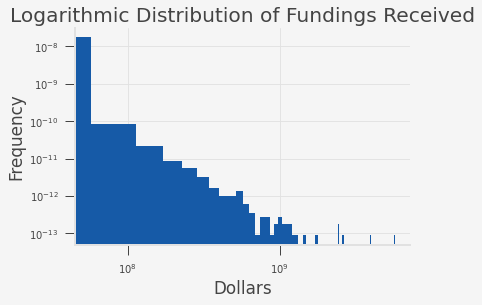

In [83]:
# === funding ===
dff = df.drop('entity_id', axis=1)
fig, ax = plt.subplots()
dff.plot(kind="hist", y="funding_total_usd", bins=100, legend=False, density=True, ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Logarithmic Distribution of Fundings Received")
ax.set_xlabel("Dollars")

As discussed in previous analysis, funding is heavily positively skewed, and this logarithmic-scaled histogram supports that idea: most startups received no funding, while a few received increasingly large sums of funding. This could be indicative of the high degree of competition between startups to attract venture capital funds. 

##### Country

Text(0.5, 0, 'Country')

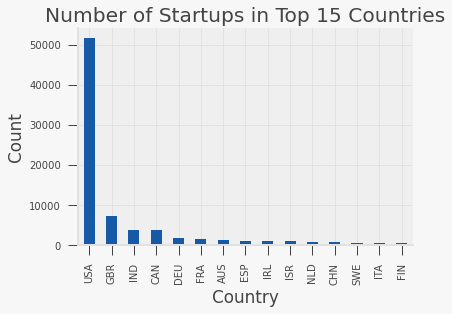

In [84]:
# === country frequency ===
fig, ax = plt.subplots()
df_co['country_code'].value_counts().plot(kind='bar', ax = ax)
ax.set_title("Number of Startups in Top 15 Countries")
ax.set_ylabel("Count")
ax.set_xlabel("Country")

Immediately, the bar plot above disoplays the disproportation in number of startups in the US and anywhere else. It may therefore even be worthwhile for future studies to explore the vairations of fundings in particular states within the US only, as, statistically speaking, most startups are established in the United States. 
<br>Next, we observe a relationship between the frequency of startups and how developed a country is (this could be quantitatively varified in future studies that pair countries or regions with their GDP or GDP per capita). 

##### Category

Text(0.5, 0, 'Category')

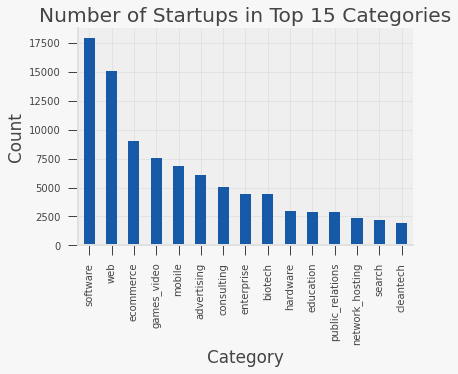

In [85]:
# === category frequency ===
fig, ax = plt.subplots()
df_cat['category_code'].value_counts().plot(kind='bar', ax=ax)
ax.set_title("Number of Startups in Top 15 Categories")
ax.set_ylabel("Count")
ax.set_xlabel("Category")

The bar plot above displays the top 15 most popular categories for startups, with software leading. Interestingly, clean technology, which was one of the best categories in attracting fundings based on initial analysis, is the third-least populated in this list. This, coupled with the high funding levels in clean technology, makes this industry a great pick for entrepreneurs looking to launch a startup. It is however likely that high scientific barriers to entry have been avoiding that, thus keeping the industry small in terms of number of startups.

#### Relationships

##### Relationship between country and funding

<AxesSubplot:title={'center':'Mean funding per country'}, xlabel='country', ylabel='Mean funding (USD)'>

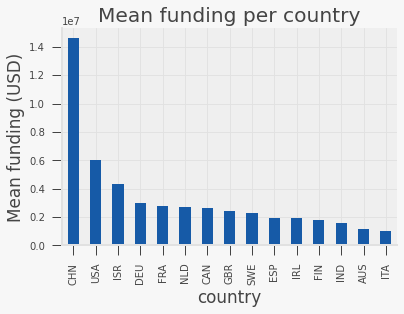

In [86]:
dfg_COFUND = df_co.groupby(['country_code'])['funding_total_usd'].mean()
dfg_COFUND = dfg_COFUND.sort_values(ascending=False)
dfg_COFUND.plot(kind='bar', title='Mean funding per country', ylabel='Mean funding (USD)', xlabel='country')

The bar chart above depicts mean funding levels, in USD, per country. This average is significantly higher in China than anywhere else, followed by US and Israel. European nations, more or less, maintained a similar funding on average. This data calls for future research on the relationship of mean fundings with the growth rate of GDP per country, as both China and Israel are emerging economies. Alternatively, future research could classify headquarter countries based on their income level, GDP or GDP per capita, as majority of the mentioned countries have a relatively high GDP per capita. It is also crucial to encorporate other measures of average funding per country, as the mean does not reflect the spread of fundings in each country.

##### Relationship between category and funding

<AxesSubplot:title={'center':'Mean funding per category'}, xlabel='category', ylabel='Mean funding (USD)'>

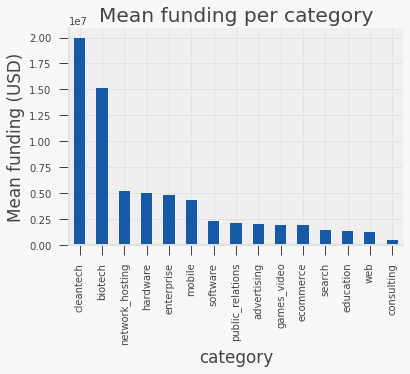

In [87]:
dfg_CATFUND = df_cat.groupby(['category_code'])['funding_total_usd'].mean()
dfg_CATFUND = dfg_CATFUND.sort_values(ascending=False)
dfg_CATFUND.plot(kind='bar', title='Mean funding per category', ylabel='Mean funding (USD)', xlabel='category')

The bar chart above depicts mean funding levels, in USD, per category. Clean technology, biotechnology and network hosting received the highest level of fundings respectively. Other than being heavily tech-based, what these categories share is being relatively new. For example while categories like software and web are significantly more technological, they received significantly less funding on average. Future study could thus benefit from pairing categories with an index representing the industry's infancy or recent growth. 

### Summary of initial findings

So far, the study has looked at top 15 countries and categories in terms of the number of startups they have. The short study has indicated some relationship between a startup's country of origin and the amount of fundings it receives, as well as a relationship between the startup's category (industry) and the amount of funding it receives. The study has also provided some information about the distribution and skew of funding within each of these classifications that may be important to keep in mind moving forward with this study.

### Future steps

Future steps would include improving the current independent variables, firstly by pairing and classifying them with a numerical indicator. This could be GDP, GDP per capita or growth rate of GDP for country, and GDP of industry, an index or measure on infancy of the industry or growth rate of GDP in that industry. By amending and enhancing the classification, we would eventually be able to encorporate more than just the top 15 within each independent variable, thus having a more extensive data and more generalizable conclusion. Finally, the study has not yet explored the intersection between countries and categories in the determination of average startup fundins, which could convey other important information for entrepreneurs looking to establish a startup in a particular country or a particular industry.

## Project Two

### The message

This part of the study aims to demonstrate how the average venture capital funding for startups varries between countries, particularly based on the country's income level and across categories. The message is that there is a linear relationship between the average funding for startups, and the GNI per capita in their country of origin, except for select industries in middle-income economies that tend to be traditionally offshore-outsourced functions. In middle income countries, these categories seem to receieve systematically higher funding than what the linear relationship would represent.

#### Subgroup: Countries by Income level

To visualize how both the location and category of a startup simultaneously affect the venture capital funding received, a new dataframe "income" is used. This dataframe was created using 2020 Gross National Income (GNI) per capita provided by the World Bank (https://data.worldbank.org/indicator/NY.GNP.PCAP.CD). 

Three main columns of interest in this dataframe are the 3-digit country_code, 2020 GNI per capita and income_level, which indicates whether a country is a high income or low income country. According to the World Bank, low income economies are those with a GNI per capita of 1,045 USD or less in 2020; lower middle-income economies are those with a GNI per capita between 1,046 USD and 4,095 USD; upper middle-income economies are those with a GNI per capita between 4,096 USD and 12,695 USD and high-income economies are those with a GNI per capita of 12,696 USD or more (https://datahelpdesk.worldbank.org/knowledgebase/articles/906519#High_income). 

For the purpose of this analysis, I have renamed upper middle-income countries to simply middle-income, and joined lower middle-income and low income economies together as low income, as there were not enough startup funding data on lower middle-income and low income economies separately. Finally, I merge the income data from the new dataframe with my original dataframe and look for any considerable missing values. In this case, it was not necessary to drop anny missing values as all missing values were category codes, and I am only analyzing the data from the top 15 categories.

In [88]:
income = pd.DataFrame(pd.read_csv('data/gni_per_capita.csv')[['income_level', '2020', 'country_code']])
df_income = pd.merge(income, df, on="country_code", how="inner")
df_income.isnull().sum()

income_level            0
2020                    0
country_code            0
entity_type             0
entity_id               0
normalized_name         0
category_code        6743
funding_total_usd       0
dtype: int64

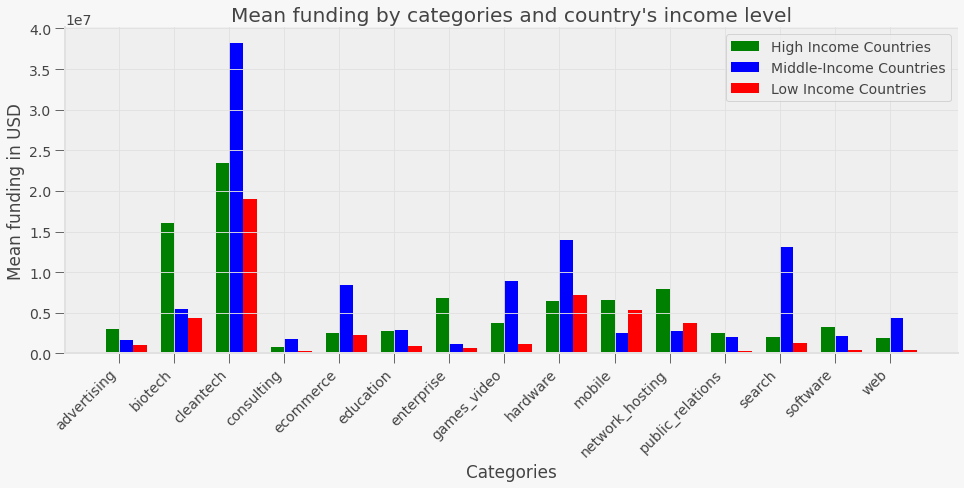

In [45]:
gb_income = df_income.groupby('income_level')
high_inc = gb_income.get_group('high income')
high_inc = high_inc[high_inc['category_code'].isin(top_cats)]
high_inc_CATFUND = high_inc.groupby(['category_code'])['funding_total_usd'].mean()

mid_inc = gb_income.get_group('middle-income')
mid_inc = mid_inc[mid_inc['category_code'].isin(top_cats)]
mid_inc_CATFUND = mid_inc.groupby(['category_code'])['funding_total_usd'].mean()

low_inc = gb_income.get_group('low income')
low_inc = low_inc[low_inc['category_code'].isin(top_cats)]
low_inc_CATFUND = low_inc.groupby(['category_code'])['funding_total_usd'].mean()

n_groups = 15
fig, ax = plt.subplots(figsize=(16, 6))
index = np.arange(n_groups)
bar_width = 0.25

rects1 = ax.bar(index, high_inc_CATFUND, bar_width, label='High Income Countries', color='g')
rects2 = ax.bar(index + bar_width, mid_inc_CATFUND, bar_width, label='Middle-Income Countries', color='b')
rects3 = ax.bar(index + bar_width * 2, low_inc_CATFUND, bar_width, label='Low Income Countries', color='r')

ax.set_xlabel('Categories')
ax.set_ylabel('Mean funding in USD')
ax.set_title('Mean funding by categories and country\'s income level')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels((top_cats), rotation=45, ha='right')
ax.legend()

The plot above, constructed using GNI per capita data and mean funding in 15 most popular categories, is consistent with the previous findings of this study. Firstly, almost all triads display a difference in fundings for their category, indicating that funding levels vary between high, middle and low income countries. There are few exceptions to this case: ecommerce startups are similarly funded in high and low income countries. This similarity is also somewhat observed in hardware, mobile and seach industries. This is perhaps because functions under these categories are often very easily offshored and outsourced, hence more competition on a global scale and the insignificant difference in funding. Next, education and, to some extent, public relations and software startups are funded similarly in high income and middle-income countries and biotech startups are almost funded similarly in middle-income and low income economies. 

Secondly, the plot shows how funding levels vary across startup categories. Again, venture capital funders seem to favour tech-based industries, with clean technology dominating across all income classifications, while consulting maintains the lowest funding in high income and low income countries, and one of the lowest fundings in middle-income ecconomies.

Finally, the plot suggests that fundings are systematically - for all categories - sub-optimal in low income economies. However, out of the context of specific industries, the plot shows no systematic relationship between a country's GNI per capita and average funding when comparing high income and middle-income economies. Therefore, it is only wise to compare funding levels across high and middle-income countries within specific startup categories. For example, high income countries, on average, receive more funding in fields of advertising, biotech, enterprise, network hosting and software, while middle income countries on the other hand receive significantly more funding for startups involved with clean technology, ecommerce, video games, hardware, search and web. This could somewhat be explained by the distribution of these categories across high and middle-income countries: middle-income countries, like China, have been dominating in outsourced technological fields, like hardware, web, search and ecommerce, for many years. This explanation however does not justify middle-income countries' higher funding in clean technology and video games.

### Mapping

#### Map 1: Average startup funding across the world

For a visual representation of the relationship between fundings and startup's country of origin, I plot the average funding in each country across the world in the heatmap below.

In [89]:
# first, I find the average funding per country and create a new dataframe:
gcountry = df.drop('entity_id', axis=1).groupby("country_code")

mean_per_co = gcountry.mean().rename(columns = {'funding_total_usd': 'mean_funding_co'})
df_mean = pd.merge(df, mean_per_co, on="country_code")
df_mean = df_mean.drop(['entity_id', 'entity_type', 'normalized_name', 'category_code', 'funding_total_usd'], axis=1)
df_mean = df_mean.drop_duplicates(subset='country_code')
df_mean = df_mean.sort_values(by=['country_code'])
df_mean.isnull().sum() # no missing observations

country_code       0
mean_funding_co    0
dtype: int64

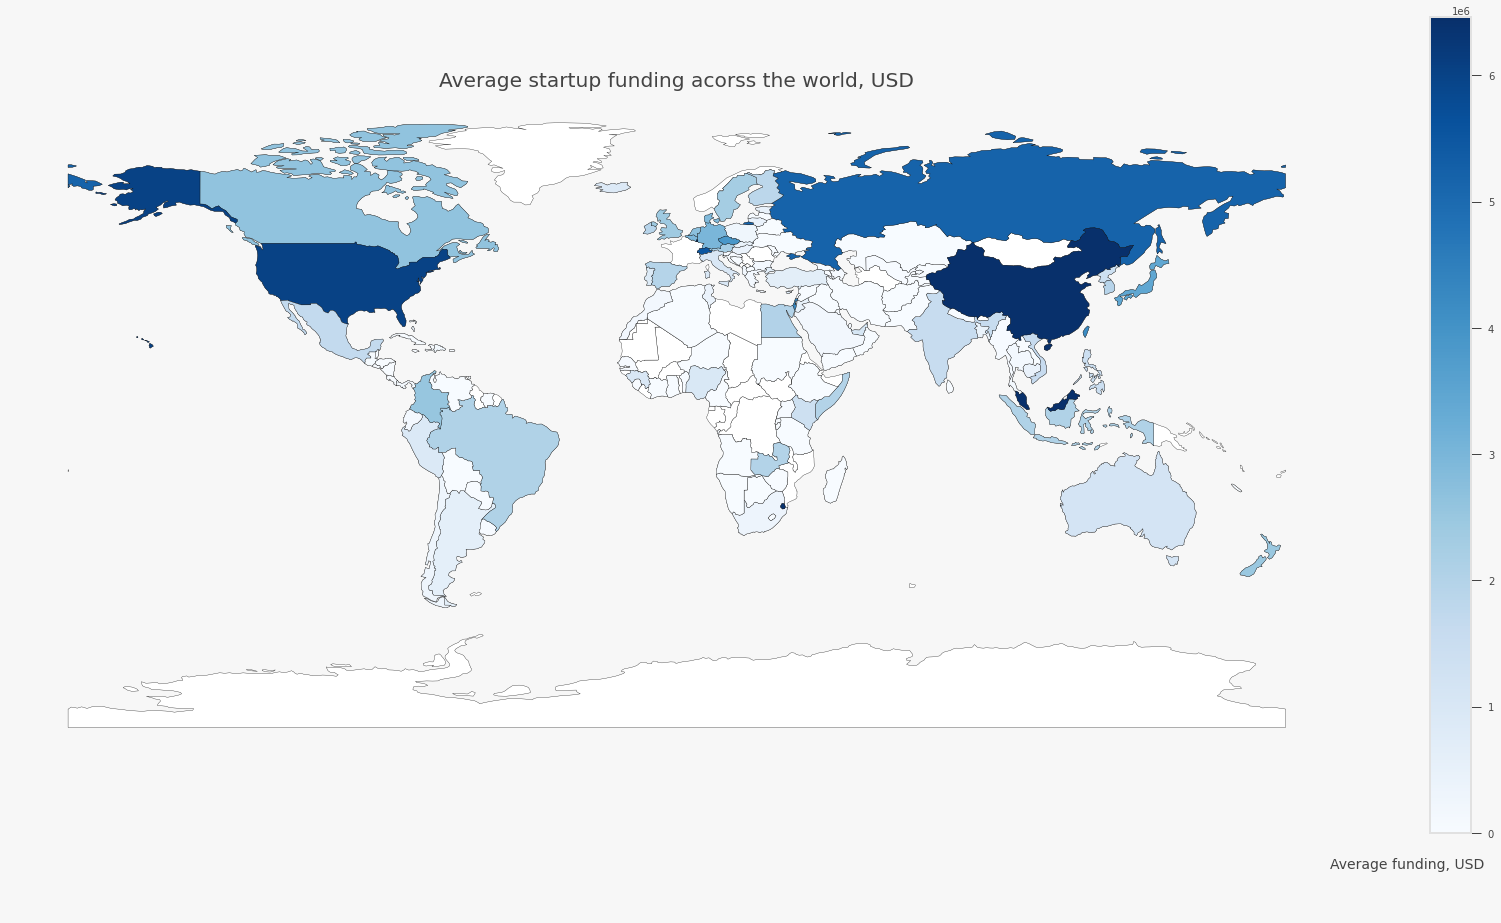

In [90]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
funding_gdf = pd.merge(world, df_mean, left_on="iso_a3", right_on="country_code", how="inner")
fig, gax = plt.subplots(figsize=(30,15))
world.plot(ax = gax, edgecolor='black', color='white')

funding_gdf.plot(
    ax=gax, edgecolor='black', column='mean_funding_co', legend=True, cmap='Blues',
    vmin=0, vmax=6.458136e+06 # highest mean funding which belongs to China
)

gax.set_title('Average startup funding acorss the world, USD')
gax.annotate('Average funding, USD',xy=(1330, 55), xycoords='figure points')
plt.axis('off')
plt.show()

The map displays the vast difference in mean funding acorss countries. As seen previously inn summary statistics, China has the highest mean funding. Furthermore, US, Israel and Switzerland also have significantly high fundings, as seen in both summary statistics and the map. The map also shows similarly high average fundings in Malaysia, Swaziland and Russia, which could not be observed previously given the popularity sample of 15 countries. This is particularly important as Malaysia and Swaziland have different economic structures and income levels than other countries with large average fundings, suggesting that income and overall economic strength are not the only determinants of how high average fundings in a given country are.

It is important to note that many countries have an average funding of 0, which indicates that there is venture capital lending in that country. This phenomenon is mainly visible in sub-saharran Africa and few countries in central Asia and central America. Finally, countries with high fundings do not share any significant geographiocal characteristics, such as region, access to sea or land area.

#### Map 2 : GNI per capita, 2020

To observe the relationship between funding and income levels better, I also map 2020 GNI per capita data which were collected from the World Bank website. While using a logarithmic scale of GNI per capita would show variations for low GNI countries as well, I chose to map GNI normally as it better identifies economies with enormous levels of GNI per capita, which is more informative for comparing and matching enormously high GNI per capitas to enormously high startup funding levels.

In [91]:
df_GNI = df_income.drop(['entity_id', 'entity_type', 'income_level', 'normalized_name', 'category_code', \
                         'funding_total_usd'], axis=1)
df_GNI = df_GNI.drop_duplicates(subset='country_code')
df_GNI = df_GNI.sort_values(by=['country_code'])
df_GNI.isnull().sum() # no missing observations to drop

2020            0
country_code    0
dtype: int64

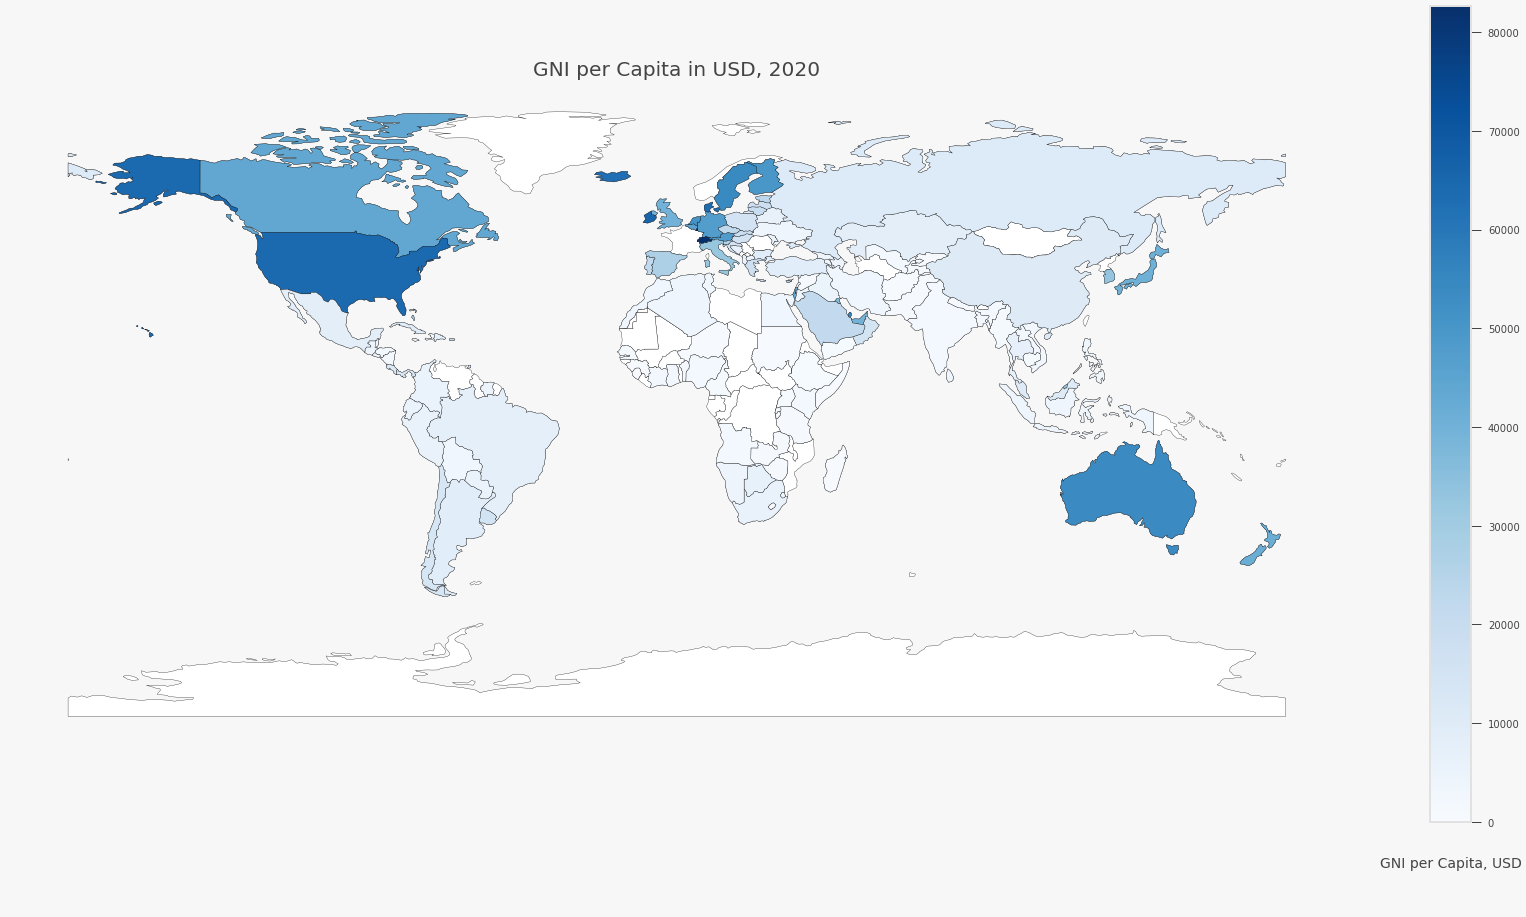

In [92]:
gni_per_capita = pd.merge(world, df_GNI, left_on="iso_a3", right_on="country_code", how="inner")
# gni_per_capita['2020'] = np.log(gni_per_capita['2020'])
fig, gax = plt.subplots(figsize=(30,15))
world.plot(ax = gax, edgecolor='black', color='white')

gni_per_capita.plot(
    ax=gax, edgecolor='black', column='2020', legend=True, cmap='Blues',
    vmin=0, vmax=82620 # Switzerland had the highest GNI per capita: 82620 USD, ln(82620) = 12.32
)

gax.set_title('GNI per Capita in USD, 2020')
gax.annotate('GNI per Capita, USD',xy=(1380, 50), xycoords='figure points')
plt.axis('off')
plt.show()

The map above shows some overlap between high income countries and countries with high startup fundings on average, particularly in the case of US, Switzerland and Israel. However, China, along with Russia, Malaysia and Swaziland do not reflect relationship: while they have some of the highest startup fundings on average, they are not high income countries - China, Malaysia and Russia are all middle-income countries. Next, Australia, and some Scandinavian countries such as Finland, Iceland and Sweden somewhat contradicts the mentioned relationship as well, as startup average fundings seem to be disproportionately low given the country's high GNI per capita. In this case however, more quantitative analysis is required to determine whether the magnitude of this divergence is of any significance. Other than in the mentioned locations, the GNI in most locations appears to be consistent with the avergae startup funding in that country. 

This observation suggest that while there is a positive relationship between a country's income level, as measured by GNI per capita, and the average startup funding in that country, this relationship does not apply to middle-income countries. Startups in this subgroup of economies tend to receive disproportionately more funding on average, given the country's income level. These findings is consistent with the "Mean funding by categories and country's income level" graph findings, which also pointed out the disproportionate funding levels in middle-income economies in multiple categories.

### Summary of project 2

This part of the study has demonstrated how the average venture capital funding for startups varries between countries of different income levels and across categories. While there is a linear relationship between the average funding for startups and the GNI per capita in their country of origin, this relationship does not hold well in middle-income economies. Particularly, middle-income economies seem to be investing disproportionately more in startups in classically offshore-outsourced industries like ecommerce, hardware, web and search. Newer client-oriented startups, like advertising, education, enterprise and network-hosting remain funded proportionally to a country's income levels though.

## Project 3

#### Explaining industry-based variations across countries of different income levels
In the previous section, I demonstrated that different startup categories receive different amounts of funding on average, depending on whether they are in a high, medium or low income countries. While country-based income levels were strong explanators in determining the differences in mean startup funding in high and low income countries, the results were quite irregular for middle-income economies. Particularly, it appeared that startups in middle income economies receive much more funding for traditionally offshore-outsourced tech-based industrial functions, such as ecommerce, hardware, web and search, while startups in high income economies receive more funding in other industries, particularly in service sector. 

I argue that this is because middle-income economies have a fundamentally different structure of industry-based incomes. That is, as a result of historically large volumes of outsource-offshoring of technical and industrial functions to middle-income economies like China and Malaysia, these industries now yield proportionally higher income than some of the more modern, service based industries. Therefore, investors, anticipating such higher revenues and opportunities, are attracted by those tech-based industries in middle income economies. If my hypothesis is correct, that means that we do not need a new factor to explain the irregular variations of funding levels for tech-based industries in middle income economies. <strong>Instead, we need to look more closely at the income levels of individual industries in countries of different income levels.<strong>

### Finding industry incomes through web-scraping
It is very difficult to track incomes of different industries for every country/ economy, especially if we are trying to specifically define and narrow down an industry. A close estimate of this data can be obtained through web-scraping.

To do so, first, we need to define what kind of companies our industry consists of, and gather a list of those companies (or at least a large enough sample of the major ones) from every country of interest. Using Python's Wikipedia scraping API, we could easily search for a list of top public companies in each given industry in each country of interest by looping over our list of countries and industries and scraping for company names (e.g. top public biotech companies in Switzerland). Next, by using Bloomberg Terminal's scraping API, we could obtail the companies' most recent revenue data and add them up to get an estimate of industry-wide revenue in each country. Finally, these data could be merged with our existing dataframe, grouped by country and category, to allow the comparing of the relationship between income and funding in each industry in each country. The results would help determine if in fact the industry-specific income levels can help accurately determine the variations in funding levels acorss industries in countries of different income levels.

While the data scraping does not need to be repeated for a given time, it could be helpful to use financial literature to determine what year or quarter of revenues are best to scrape for the purpose of this analysis. This is to reduce the effects of confounding variables, such as pandemics, geopolitical conflicts or major recessions on industry-wide incomes. Another challenge in the described web-scraping method is that the Bloomberg Terminal and Wikipedia may both have limited data on public companies in third-world countries and smaller economies. More research and perhaps web-scraping may be needed to find local data sources that can be scraped through APIs or HTML to find sufficient information on industry incomes globally. With stronger financial literacy, a better understading of local resources about public companies, and proficiency in working with the Bloomberg Terminal and its financial data, the ideal data can be collected. 

### Scraping Wikipedia for sectoral income levels across countries

For now, I scrape Wikipedia for 2017 data on each country's sectoral GDP to obtain a more specific estimate of the effect of income levels on funding levels. While updated data, and data specific to specifc industries (rather than sectors) would be preferred, this data would still allow for sufficient and convenient analysis to determine whether income levels can explain variations in funding across countries and industries. 

The merging and analysis methodology remains largly similar to the one described for idustry inome analysis. I classify startup categories based on which sector, out of industrial or service sector, they belong to, and compare the average funding for startups in that sector of the given country against the sectoral income (GDP) of that country. This allows me to observe the relationship between startup fundings and the income level in their domain of operation more closely.

For convenience, I use the BeautifulSoup library to clean the HTML response from the Wikipedia table on sector-based income, and create a new dataframe called gdp_by_sector to read data for every country's GDP from industrial sector, as well as its GDP from the service sector. These are the most relevant categories to my analysis, as startups tend to be in either of these sectors, and not in agriculture.

Next, I read all the values in the Wikipedia table by taking advantage of HTML tag 'tr', and go through them row by row to collect and clean (remove extra commas and white spaces) the columns for each country's name, industrial and service GDP.

Note that the data I scraped used shortened versions of some countries names, which were incompatible with the standard names found in other data sources, including for conversions to 3-letter abbrevations. Since this was the case for only 3 countries of importance to my analysis, I chose to manually correct those names rather than autmating the correction.

In [93]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

web_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_sector_composition'
response = requests.get(web_url)
soup_object = BeautifulSoup(response.content)
data_table = soup_object.find_all('table', 'wikitable sortable')[0]
all_values = data_table.find_all('tr')
gdp_by_sector = pd.DataFrame(columns = ['country', 'industrial_gdp_mil_USD', 'service_gdp_mil_USD'])

ix = 0

for row in all_values[1:]:
    values = row.find_all('td')
    country = values[0].text.strip()
    industrial = float(values[6].text.strip().replace(',', ''))
    service = float(values[7].text.strip().replace(',', ''))
                     
    gdp_by_sector.loc[ix] = [country, industrial, service]
    ix += 1

# For these countries, Wikipedia uses a shorter version of their name that is incompatible with my data
# Since this was the case for only 3 observations of interest, I chose to correct them manually.
gdp_by_sector.at[3, "country"] = "United States of America"
gdp_by_sector.at[11, "country"] = "United Kingdom of Great Britain and Northern Ireland"
gdp_by_sector.at[7, "country"] = "Russian Federation"

gdp_by_sector

,country,industrial_gdp_mil_USD,service_gdp_mil_USD
0,World,"38,340,000","80,514,000"
1,China,"9,400,050","11,976,360"
2,European Union,"5,233,350","14,782,650"
3,United States of America,"3,722,590","15,592,000"
4,India,"2,179,020","5,826,510"
...,...,...,...
217,Anguilla,18,151
218,Montserrat,13,151
219,Nauru,53,97
220,Tuvalu,2,29


Another incompatibility of the scraped data with my existing data comes from the fact that the data categorises countries by names, while my dataframe uses 3-letter abbrevations to represent countries. To overcome the problem, I performed another HTML-based web scraping on the IBAN website to create a dataframe that matches standard country names to their standard 3-letter abbrevation. I then merged these data with my gdp_by_sector on country names.

In [94]:
web_url = 'https://www.iban.com/country-codes'
response = requests.get(web_url)
soup_object = BeautifulSoup(response.content)
data_table = soup_object.find_all('table', 'table table-bordered downloads tablesorter')[0]
all_values = data_table.find_all('tr')
names = pd.DataFrame(columns = ['country', 'iso_a3'])

ix = 0

for row in all_values[1:]:
    values = row.find_all('td')
    country = values[0].text.replace('(the)', '').strip()
    iso_a3 = values[2].text.strip()
                     
    names.loc[ix] = [country, iso_a3] 
    ix += 1

gdp_by_sector = pd.merge(gdp_by_sector, names, on="country", how="inner")
gdp_by_sector = gdp_by_sector.set_index('iso_a3')
gdp_by_sector

,country,industrial_gdp_mil_USD,service_gdp_mil_USD
iso_a3,,,
CHN,China,"9,400,050","11,976,360"
USA,United States of America,"3,722,590","15,592,000"
IND,India,"2,179,020","5,826,510"
JPN,Japan,"1,638,343","3,739,341"
DEU,Germany,"1,289,093","2,880,514"
...,...,...,...
AIA,Anguilla,18,151
MSR,Montserrat,13,151
NRU,Nauru,53,97


Note that the Wikipedia entry had data on certain regions that did not represent countries (European Union and World for example), so by merging the data with the dataframe containing 3-letter abbreviations, I automatically remove those as well.

For the purpose of this short study, I again take a sample of countries and categories as running the code for all would be extremely time consuming, and not very informative since many countries have a very limited collection for startups and fundings. 

This time, I use the same popular sample of categories, and divide them into services and industrial functions. In doing so, I used my own judgement and common knowledge. Notice that there may be some sectoral overlap for certain sectors, the analysis and determination of which is beyond the scope of this paper. For example, web, seach and software categories may also be providing services, and the specific function of an ecommerce may include industrial components. Future replications could classify these categories more carefully and more scientifically. I also use the same sample of countries, except I also consider Malaysia and Russia, as they were, other than China, the two significant observations of middle-income countries with large numbers of startups and irregular fundings.

Using these defintions, I then collect the mean funding for industial and service sectors for the mentioned countries.

In [95]:
industrials = ['biotech', 'cleantech', 'games_video', 'hardware', 'mobile', 'search', 'software', 'web']
services = ['advertising', 'consulting', 'ecommerce', 'education', 'enterprise', 'network_hosting', 'public_relations']
interesting_cos = top_co + ['MYS', 'RUS']

mean_funding_per_sector = {}        
for co in interesting_cos:
    i, ci = 0, 0
    s, cs = 0, 0
    for row in df.index:
        if df['country_code'][row] == co:
            if df['category_code'][row] in industrials:
                i += df['funding_total_usd'][row]
                ci += 1
            elif df['category_code'][row] in services:
                s += df['funding_total_usd'][row]
                cs += 1
    mean_funding_per_sector[co] = [i/ci, s/cs]

I then merge these mean fundings with my collected data about sectoral GDP levels for all the selected countries. Notice that the GDP values arte in millions of USD, while mean fundings are simply in USD. I do not sync these values to focus more on the proportions in comparing the correlations between each sector of each country's income levels.

In [96]:
df_by_sector = pd.DataFrame(mean_funding_per_sector).T

df_by_sector.rename(columns={0: 'mean_industrial_funding', 1: 'mean_services_funding'}, inplace=True)
gdp_by_sector2 = pd.merge(gdp_by_sector, df_by_sector, left_index=True, right_index=True, how="inner")
gdp_by_sector2 = gdp_by_sector2.drop(['country'], axis=1)

column_names = ["industrial_gdp_mil_USD", "mean_industrial_funding", "service_gdp_mil_USD", "mean_services_funding"]

gdp_by_sector2 = gdp_by_sector2.reindex(columns=column_names)
gdp_by_sector2

,industrial_gdp_mil_USD,mean_industrial_funding,service_gdp_mil_USD,mean_services_funding
CHN,"9,400,050","17,004,752","11,976,360","14,585,657"
USA,"3,722,590","7,321,799","15,592,000","4,548,627"
IND,"2,179,020","1,622,621","5,826,510","1,659,829"
DEU,"1,289,093","3,580,854","2,880,514","1,615,271"
RUS,"1,301,184","7,688,122","2,501,968","5,105,619"
FRA,"633,473","3,056,709","2,377,684","1,756,146"
GBR,"590,850","2,670,900","2,316,600","1,902,918"
ITA,"553,763","742,986","1,712,263","369,125"
ESP,"412,496","1,384,877","1,319,276","3,673,307"
CAN,"500,268","3,464,316","1,245,348","1,431,389"


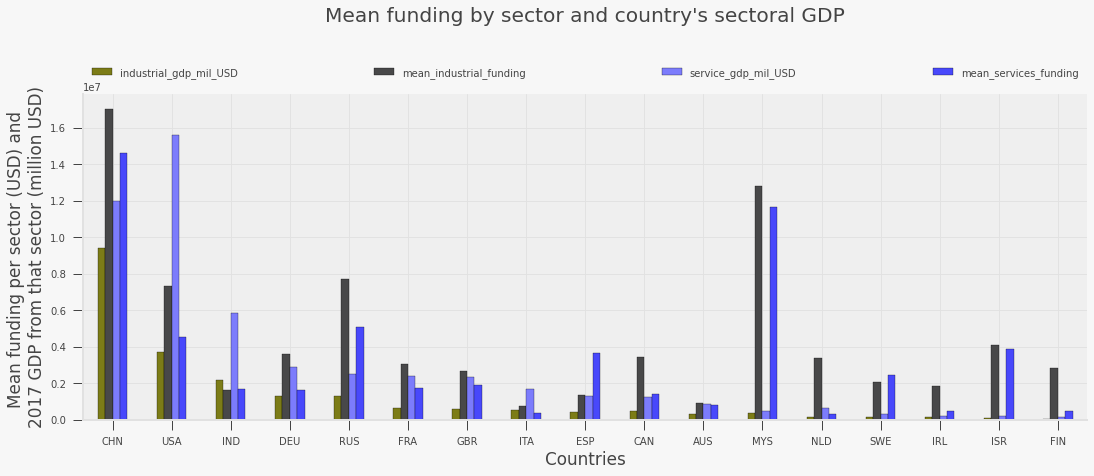

In [97]:
colors = [(0.488, 0.488, 0.089),(0.282, 0.282, 0.285), (0.488, 0.488, 0.989),(0.282, 0.282, 0.985)]

fig, ax = plt.subplots(figsize=(18, 6))

ax.set_xlabel('Countries')
ax.set_ylabel('Mean funding per sector (USD) and \n2017 GDP from that sector (million USD)')
ax.set_title('Mean funding by sector and country\'s sectoral GDP\n\n\n')

gdp_by_sector2.plot(kind="bar", color=colors, ax=ax, edgecolor="k", rot=0)
ax.legend(bbox_to_anchor=(0, 1.02, 1.0, 1.02), loc=4, mode="expand", ncol=17)

The graph above allows for a close observation of the variations of sectoral GDP and sectoral average startup funding for key countries of interest. This analysis contradicts my hypothesis, as it shows how middle-income countries - China, Malaysia and Russia have particularly high levels of industrial funding, while in fact their share of GDP from the industrial sector are not significantly different from other countries. Furthermore, while China, Russia and Malaysia all have higher mean fundings for startups in the industrial sector than in the service sector, they all have higher funding levels for startups in the service sector on average than high income countries. This shows that, contrary to my expectations, the particularly high funding levels in middle-income economies are not trigerred by their income level or the income generated by specific sectors. Future studies could therefore aim to find factors that explain this irregularity better. 

Furthermore, the graph shows no systematic relationship between income levels of a sector and the funding levels available in that sector for other countries either. For example, the US GDP from its service is extremely large, but the avergae funding levels for startups in that sector do not reflect the enormous income. Yet, Israel has enormous funding levels on average for startups in both its service and industrial sector, despite the relatively low levels of GDP generated by either of those sectors. There is therefore no significant correlation between the income levels in a particular sector, and average funding levels for startups in that sector.

### Summary of project 3

This part of the project has demonstrated that contrary to my hypothesis based on the relationship between a country's income level per capita and the average levels of funding for startups in that country, sectoral income amounts fo not determine the average funding for startups in that sector. In fact, there is no significant relationship between the two. Furthermore, industrial sector incomes are not particularly higher in middle-income countries, despite their higher average funding for startups in industrial sectors. Sectoral income differences across countries therefore do not explain differences in startup fundings of classically offshored sectors in middle-income economies. Future studies could thus investigate better ways to explain variations across sectors, particularly focusing on irregularities of the proportions of GNI per capita and average fundings in middle income economies.

## Final Project

Economically speaking, higher aggregate income levels in an economy would result in higher savings and higher investments. The original hypothesis about the relationship between a startup's funding and the income levels in its domain (geographical and sectoral) was thus perceived to be a linear, positive one. More specifically, I anticipated a positive, linear relationship between a startup's funding, and the income level in its country of origin (as represented by GNI per capita). Similarly, it was also hypothesised that there is a positive, linear relationship between the startup's funding and the income in its specific sector within that country. However, preliminary visual analyses suggested that the relationship does not hold strongly in middle-income economies, as they have systematically higher startup funding levels for their income level, specifically for certain types of industries. Therefore, I predicted a non-linear relationship, potentially parabolic, between GNI per capita in a country and the mean startup funding levels in that country. Furthermore, visual analysis did not show significant systematic variation in mean startup funding for different sectoral GDP levels. 

To demonstrate these relationships and analyse them formally, I run two main sets of simple regressions. First, I run an ordinary least squares regression where the dependent (Y) variable is the log of mean startup funding (in dollars) in a given country, and the independent (X) variable is the log of that country's GNI per capita (measured in dollars) in 2020 - a measure of income level in that economy. Within that section, I adjust the independent variable twice to explore how the relationship holds or differs for specific subgroups - particularly, omitting middle-income countries, and omitting both low and middle-income countries. 

The second set of simple regressions that I run is also an ordinary least square, aimed particularly at testing whether funding levels in middle-income economies could be better explained using the income of the sectors in which they lie. In this section, I run two different sets of regressions to analyse how a startup's funding changes with its sector's income level in that country. For the purpose of this analysis, I only consider startups that fall within the top 15 most popular categories (industries), so that I can manually determine whether the industry falls into the industry sector or service sector. As per the previous analyses, industrial categories include biotech, cleantech, videogames, hardware, mobile, search, software and web, and service categories include advertising, consulting, ecommerce, education, enterprise, network hosting and public relations. Here, the dependent (Y) variable is the log of mean startup funding (in dollars) in a given country, in the given sector. The independent (X) variable is the log of GDP in that country in that sector, as of 2017. Finally, I demonstrate how separating countries based on their income levels can improve the quality of the analysis, given that preliminary analysis has shown that middle-income economies are systematically different in alocating funding to startups. 

For all regressions, I use a logarithmic scale to be able to respond to skewness towards large values without classifying them as outliers and dropping them. Large values in this study are particularly important as they represent economies with highest funding levels and highest overall or sectoral incomes, which makes them important observations to consider. Furthermore, it is important to note that all countries with a mean startup funding of 0 have been omitted from the regressions in order to avoid errors when converting to a logrithmic scale. Therefore, in this section, I focus on answering questions about the differences in fundings for startups who receive any funding at all, rather than identifying which startups receive funding.

### OLS regression set 1: country-wide income and average fundings

##### 1.1 GNI on Mean Funding: Inclusive

First, I study the relationship between a country's income level, and the average funding for startups in that country. The following regression includes countries of low, middle and high income:

$$
\log(\text{average startup funding in a country}) = \beta_0 + \beta_1 \log(\text{GNI per capita}) + \epsilon
$$

Text(0.5, 1.0, 'Relationship between average startup funding and GNI per capita for a given country')

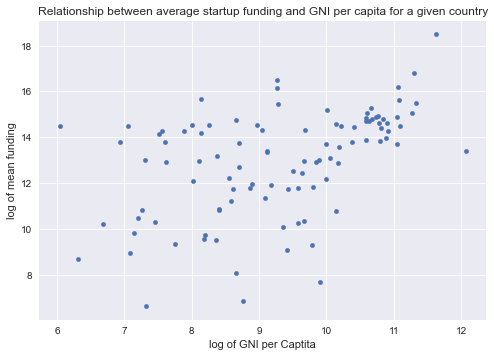

In [98]:
# adjust dataframe 
df11 = df_income.groupby('country_code')
df11 = df11['funding_total_usd'].mean().to_frame(name = 'mean_funding_usd').reset_index()
df11 = pd.merge(income, df11, on="country_code", how="inner")

# remove 0 so I can take log
for row in df11.index:
    if df11['2020'][row] == 0 or df11['mean_funding_usd'][row] == 0:
        df11 = df11.drop([row])

# log of both
df11['mean_funding_usd'] = np.log(df11['mean_funding_usd'])
df11['2020'] = np.log(df11['2020'])
df11.rename(columns={'2020': 'log of GNI per Captita', 'mean_funding_usd': 'log of mean funding'}, inplace=True)

# plot
plt.style.use('seaborn')
df11.plot(x='log of GNI per Captita', y='log of mean funding', kind='scatter')
plt.title('Relationship between average startup funding and GNI per capita for a given country')

In [99]:
df11['const'] = 1
reg11 = sm.OLS(endog=df11['log of mean funding'], exog=df11[['const', 'log of GNI per Captita']], missing='drop')
results11 = reg11.fit()
print(results11.summary())

                             OLS Regression Results                            
Dep. Variable:     log of mean funding   R-squared:                       0.224
Model:                             OLS   Adj. R-squared:                  0.216
Method:                  Least Squares   F-statistic:                     28.59
Date:                 Sat, 16 Apr 2022   Prob (F-statistic):           5.75e-07
Time:                         12:14:28   Log-Likelihood:                -214.28
No. Observations:                  101   AIC:                             432.6
Df Residuals:                       99   BIC:                             437.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

This regression suggests that a one-percent increase in the GNI per capita of a country would correspond to a 0.8% increase in funding for startups in that country on average, which is economically not very significant. The corresponding P-value rounds up to 0.000, which means that the results are significant at even a 1% level. Furthermore, the large F-statistic and very small suggests that we can reject the null hypothesis that there is no relationship between a country's income level and the average funding for startups in that country. However, according to the r-statistic, a country's income level can only explain 22.4% of the variations in average startup fundings in that country. 

Visually, the scatterplot shows that the relationship improves (becomes stronger) as income level increases. The relationship also fades away most for middle-income economies, which is consistent with our preliminary findings. Therefore, to improve the model, I omit observations for middle income economies next.

##### 1.2 GNI on Mean Funding: omitting middle income countries

$$
\log(\text{average startup funding in a high or low income country}) = \beta_0 + \beta_1 \log(\text{GNI per capita}) + \epsilon
$$

Text(0.5, 1.0, 'Relationship between average startup funding and GNI per capita for low and high income countries')

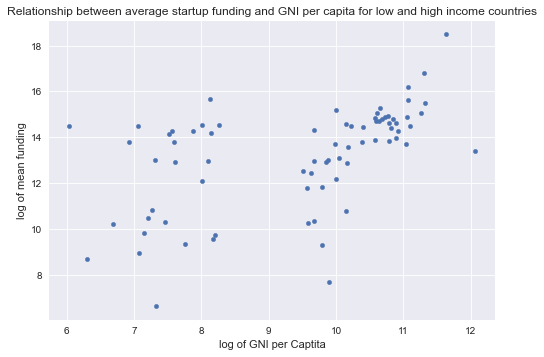

In [100]:
df12 = df11.copy()

# remove middle incomes
for row in df12.index:
    if 'middle' in df12['income_level'][row]:
        df12 = df12.drop([row])
        
# plot
plt.style.use('seaborn')
df12.plot(x='log of GNI per Captita', y='log of mean funding', kind='scatter')
plt.title('Relationship between average startup funding and GNI per capita for low and high income countries')

In [101]:
reg12 = sm.OLS(endog=df12['log of mean funding'], exog=df12[['const', 'log of GNI per Captita']], missing='drop')
results12 = reg12.fit()
print(results12.summary())

                             OLS Regression Results                            
Dep. Variable:     log of mean funding   R-squared:                       0.267
Model:                             OLS   Adj. R-squared:                  0.257
Method:                  Least Squares   F-statistic:                     26.61
Date:                 Sat, 16 Apr 2022   Prob (F-statistic):           2.06e-06
Time:                         12:14:33   Log-Likelihood:                -154.70
No. Observations:                   75   AIC:                             313.4
Df Residuals:                       73   BIC:                             318.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

Omitting observations for middle-income economies improves the model. AIC and BIC both decrease, and R-squared improves slightly. The slope of the OLS curve remains mostly similar, and the results are still significant at a 1% level. It still appears that the model can be further improved, if only applied to high-income economies, as visually, thhe scatterplot shows a much stronger relationship for high income countries, comparing to low income countries.

##### 1.3 GNI on Mean Funding: only high income

$$
\log(\text{average startup funding in a high income country}) = \beta_0 + \beta_1 \log(\text{GNI per capita}) + \epsilon
$$

Text(0.5, 1.0, 'Relationship between average startup funding and GNI per capita for high income countries')

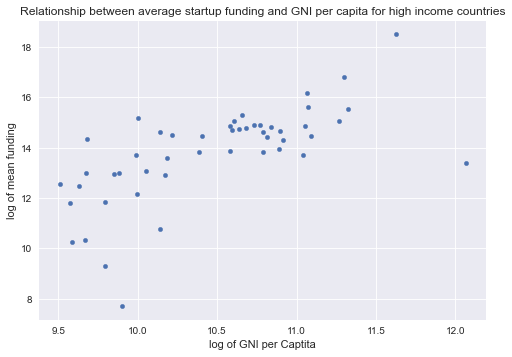

In [102]:
df13 = df12.copy()

# remove low incomes
for row in df13.index:
    if 'low' in df13['income_level'][row]:
        df13 = df13.drop([row])
        
# plot
plt.style.use('seaborn')
df13.plot(x='log of GNI per Captita', y='log of mean funding', kind='scatter')
plt.title('Relationship between average startup funding and GNI per capita for high income countries')

In [103]:
reg13 = sm.OLS(endog=df13['log of mean funding'], exog=df13[['const', 'log of GNI per Captita']], missing='drop')
results13 = reg13.fit()
print(results13.summary())

                             OLS Regression Results                            
Dep. Variable:     log of mean funding   R-squared:                       0.455
Model:                             OLS   Adj. R-squared:                  0.443
Method:                  Least Squares   F-statistic:                     39.25
Date:                 Sat, 16 Apr 2022   Prob (F-statistic):           1.07e-07
Time:                         12:14:38   Log-Likelihood:                -85.281
No. Observations:                   49   AIC:                             174.6
Df Residuals:                       47   BIC:                             178.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

When applied to high income economies only, the model improves significantly. The AIC and BIC decrease further, and according to the R-statistic, a high income country's income level can explain 45.5% of the variations in average startup fundings in that country. Furthermore, the slope of the OLS line steepens such that a one-percent increase in the GNI per capita of a high income country would correspond to a 2.1% increase in funding for startups in that country on average. This finding is much more economically significant, as it highlights the importance of taking a country's income levels into consideration when establishing a startup there. The results are still significant even at a 1% level. 

It is important to note that due to problems of endogeneity and confounding variables, this simple regression cannot confirm causality. That is, while there is a relationship between a country's income and its startup funding size, the direction of the effect cannot be determined. Also, higher income levels for a country correspond to many different factors, such as more stability in the economy, higher education levels and less volatility of markets, all of which could theoretically play a role in increasing mean startup funding levels in that country.

### OLS regression set 2: sector-wide income and average fundings

Next, I study the same relationship on a sectoral level. That is, how does average funding level for startups in a given sector (industrial or service) in a given country change with the GDP of that sector. 

##### 2.1.1 Sectoral GDP on Average Funding: Industrial sector

$$
\log(\text{average funding for an industrial startup in a country}) = \beta_0 + \beta_1 \log(\text{industrial sector's GDP}) + \epsilon
$$

Text(0.5, 1.0, "Relationship between industrial sector's GDP and average funding for startups in the industrial sector in a given country")

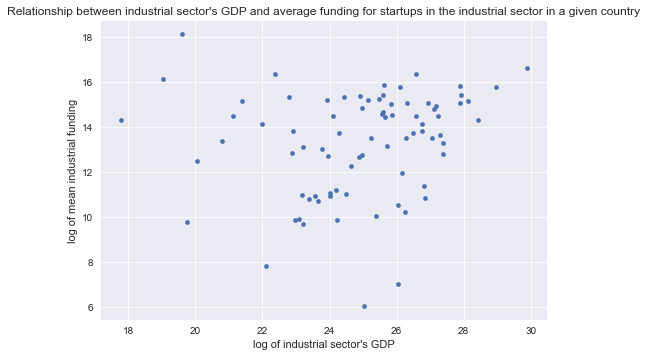

In [104]:
industrials = ['biotech', 'cleantech', 'games_video', 'hardware', 'mobile', 'search', 'software', 'web']
dfind = df_income[df_income["category_code"].isin(industrials)]
dfind = dfind.groupby('country_code')
dfind = dfind['funding_total_usd'].mean().to_frame(name = 'mean_funding_usd').reset_index()

# merge with sectoral gdp data
dfind = dfind.merge(gdp_by_sector, left_on='country_code', right_index=True, how='inner')

# remove 0 so I can take log
for row in dfind.index:
    if dfind['industrial_gdp_mil_USD'][row] == 0 or dfind['mean_funding_usd'][row] == 0:
        dfind = dfind.drop([row])

# logs and name and unit corrections
dfind['industrial_gdp_mil_USD'] = 1000000*(dfind['industrial_gdp_mil_USD'])
dfind['industrial_gdp_mil_USD'] = np.log(dfind['industrial_gdp_mil_USD'])
dfind['mean_funding_usd'] = np.log(dfind['mean_funding_usd'])
dfind.rename(columns={'industrial_gdp_mil_USD': 'log of industrial sector\'s GDP', 
                      'mean_funding_usd': 'log of mean industrial funding'}, inplace=True)

plt.style.use('seaborn')
dfind.plot(x='log of industrial sector\'s GDP', y='log of mean industrial funding', kind='scatter')
plt.title('Relationship between industrial sector\'s GDP and average funding for startups in the industrial sector in a given country')

In [105]:
dfind['const'] = 1
regind = sm.OLS(endog=dfind['log of mean industrial funding'], 
                exog=dfind[['const', 'log of industrial sector\'s GDP']], missing='drop')
resultsind = regind.fit()
print(resultsind.summary())

                                  OLS Regression Results                                  
Dep. Variable:     log of mean industrial funding   R-squared:                       0.025
Model:                                        OLS   Adj. R-squared:                  0.013
Method:                             Least Squares   F-statistic:                     2.034
Date:                            Sat, 16 Apr 2022   Prob (F-statistic):              0.158
Time:                                    12:14:43   Log-Likelihood:                -180.03
No. Observations:                              80   AIC:                             364.1
Df Residuals:                                  78   BIC:                             368.8
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025    

The findings suggest that a one-percent increase in the GDP of the industrial sector of a country would correspond to a 0.158% increase in funding for startups in that country's industrial sector on average. This is a very small change that is of low economic significance. Furthermore, the results are not significant at any conventional levels, and according to the r-squared, only 2.5% of the variations in average funding for startups in a country's industrial sector can be explained by the GDP of the industrial sector of that country. Finally, the F-statistic is smaller than the conventional levels in economics. Given the limitations of this model, I will break down the independent variable into low, middle and high income to investigate if any of these segments individually display a significant relationship.

##### 2.1.2 Sectoral GDP on Average Funding: Industrial sector, low, middle and high income countries individually analyzed

Text(0.5, 0.98, "Relationship between industrial sector's GDP and average funding for startups in the industrial sector, in low, middle and high income economies")

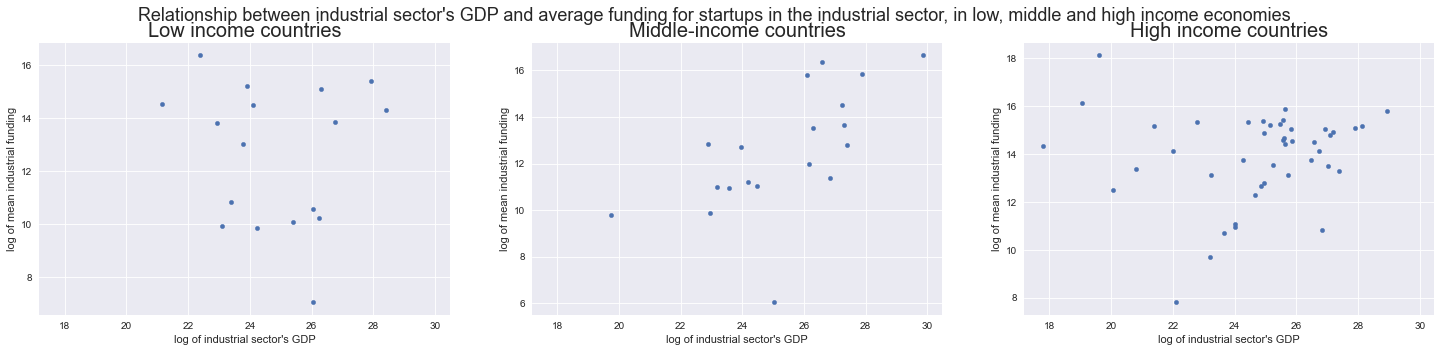

In [106]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(25,5))
plt.style.use('seaborn')

low_incomes = gb_income.get_group('low income')
low_incomes = low_incomes['country_code'].tolist()
low_incomes = list(dict.fromkeys(low_incomes))
df_ind_low = dfind[dfind["country_code"].isin(low_incomes)]
df_ind_low.plot(ax=axes[0], x='log of industrial sector\'s GDP', y='log of mean industrial funding', kind='scatter')
axes[0].set_title('Low income countries', fontsize=20)


mid_incomes = gb_income.get_group('middle-income')
mid_incomes = mid_incomes['country_code'].tolist()
mid_incomes = list(dict.fromkeys(mid_incomes))
df_ind_mid = dfind[dfind["country_code"].isin(mid_incomes)]
df_ind_mid.plot(ax=axes[1], x='log of industrial sector\'s GDP', y='log of mean industrial funding', kind='scatter')
axes[1].set_title('Middle-income countries', fontsize=20)


high_incomes = gb_income.get_group('high income')
high_incomes = high_incomes['country_code'].tolist()
high_incomes = list(dict.fromkeys(high_incomes))
df_ind_high = dfind[dfind["country_code"].isin(high_incomes)]
df_ind_high.plot(ax=axes[2], x='log of industrial sector\'s GDP', y='log of mean industrial funding', kind='scatter')
axes[2].set_title('High income countries', fontsize=20)


fig.suptitle('Relationship between industrial sector\'s GDP and average funding for startups in the industrial sector, in low, middle and high income economies', fontsize=18)

The scatterplots above display the relationship between the average funding for startups in a country's industrial sector and the industrial sector's GDP in that country, for low-, middle- and high-income economies. Visually, the middle panel shows the strongest relationship between these variables. I ran regressions for each income level separately. The results, as anticipated, showed the strongest and most significant relationship for middle income economies, but the relationship does not hold for low- and high-income economies, and the results are insignificant. I therefore only display the regressions for middle income economies:

$$
\log(\text{average funding for an industrial startup in a middle income country}) = \beta_0 + \beta_1 \log(\text{industrial sector's GDP}) + \epsilon
$$

In [107]:
# middle incomes:
regind2 = sm.OLS(endog=df_ind_mid['log of mean industrial funding'], 
                 exog=df_ind_mid[['const', 'log of industrial sector\'s GDP']], missing='drop')
resultsind2 = regind2.fit()
print(resultsind2.summary())

                                  OLS Regression Results                                  
Dep. Variable:     log of mean industrial funding   R-squared:                       0.404
Model:                                        OLS   Adj. R-squared:                  0.369
Method:                             Least Squares   F-statistic:                     11.53
Date:                            Sat, 16 Apr 2022   Prob (F-statistic):            0.00344
Time:                                    12:14:52   Log-Likelihood:                -40.102
No. Observations:                              19   AIC:                             84.20
Df Residuals:                                  17   BIC:                             86.09
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025    

The findings suggest that in middle-income economies, a one-percent increase in the GDP of the industrial sector of the country would correspond to a 0.71% increase in funding for startups in that country's industrial sector on average. While this small change may be of low economic importance, it is statistically significant at a 1% level. Furthermore, more than 40% of the variations in average funding for startups in a middle-income country's industrial sector can be explained by the GDP of the industrial sector of that country. Finally, the AIC and BIC decrease signficantly when using the model only for middle-income economies, reflecting an improvement to our model.

##### 2.2.1 Sectoral GDP on Average Funding: Service sector

$$
\log(\text{average funding for a service-sector startup in a country}) = \beta_0 + \beta_1 \log(\text{service sector's GDP}) + \epsilon
$$

Text(0.5, 1.0, "Relationship between service sector's GDP and average funding for startups in the service sector in a given country")

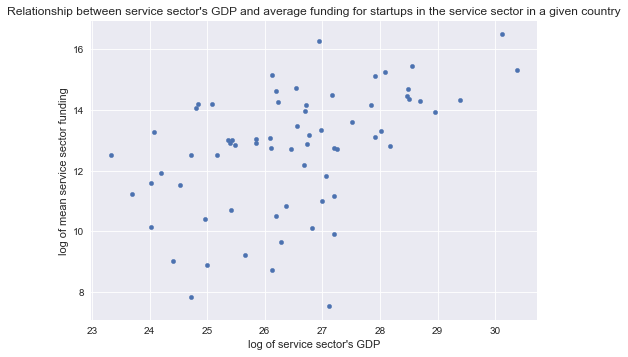

In [108]:
services = ['advertising', 'consulting', 'ecommerce', 'education', 
            'enterprise', 'network_hosting', 'public_relations']
dfserv = df_income[df_income["category_code"].isin(services)]
dfserv = dfserv.groupby('country_code')
dfserv = dfserv['funding_total_usd'].mean().to_frame(name = 'mean_funding_usd').reset_index()

# merge with sectoral gdp data
dfserv = dfserv.merge(gdp_by_sector, left_on='country_code', right_index=True, how='inner')

# remove 0 so I can take log
for row in dfserv.index:
    if dfserv['industrial_gdp_mil_USD'][row] == 0 or dfserv['mean_funding_usd'][row] == 0:
        dfserv = dfserv.drop([row])

# logs and name and unit corrections
dfserv['service_gdp_mil_USD'] = 1000000*(dfserv['service_gdp_mil_USD'])
dfserv['service_gdp_mil_USD'] = np.log(dfserv['service_gdp_mil_USD'])
dfserv['mean_funding_usd'] = np.log(dfserv['mean_funding_usd'])
dfserv.rename(columns={'service_gdp_mil_USD': 'log of service sector\'s GDP', 
                      'mean_funding_usd': 'log of mean service sector funding'}, inplace=True)

plt.style.use('seaborn')
dfserv.plot(x='log of service sector\'s GDP', y='log of mean service sector funding', kind='scatter')
plt.title('Relationship between service sector\'s GDP and average funding for startups in the service sector in a given country')

In [109]:
dfserv['const'] = 1
regserv = sm.OLS(endog=dfserv['log of mean service sector funding'], 
                 exog=dfserv[['const', 'log of service sector\'s GDP']], missing='drop')
resultsserv = regserv.fit()
print(resultsserv.summary())

                                    OLS Regression Results                                    
Dep. Variable:     log of mean service sector funding   R-squared:                       0.228
Model:                                            OLS   Adj. R-squared:                  0.216
Method:                                 Least Squares   F-statistic:                     19.47
Date:                                Sat, 16 Apr 2022   Prob (F-statistic):           3.87e-05
Time:                                        12:15:00   Log-Likelihood:                -134.84
No. Observations:                                  68   AIC:                             273.7
Df Residuals:                                      66   BIC:                             278.1
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                                  coef    std err 

The regression above suggests that there is a relationship between the average funding that startups in a country's service sector receive and the GDP generated by the service sector in that country, and that the relationship is significant at a 1% level. More specifically, the model suggests that for every 1% increase in a country's service sector GDP, startups in the service sector in that country receive 0.62% more funding on average. Furthermore, changes in a country's service sector's GDP explain 22.8% of the variances of average funding for service sector startups in that country. Recalling that preliminary evidence suggeted different funding patterns for economies of different GDP levels, the model could possibly be improved by running separate regressions for low, middle and high income countries.

##### 2.2.2 Sectoral GDP on Average Funding: Industrial sector, low, middle and high income countries individually analyzed

Text(0.5, 0.98, "Relationship between service sector's GDP and average funding for startups in the service sector, in low, middle and high income economies")

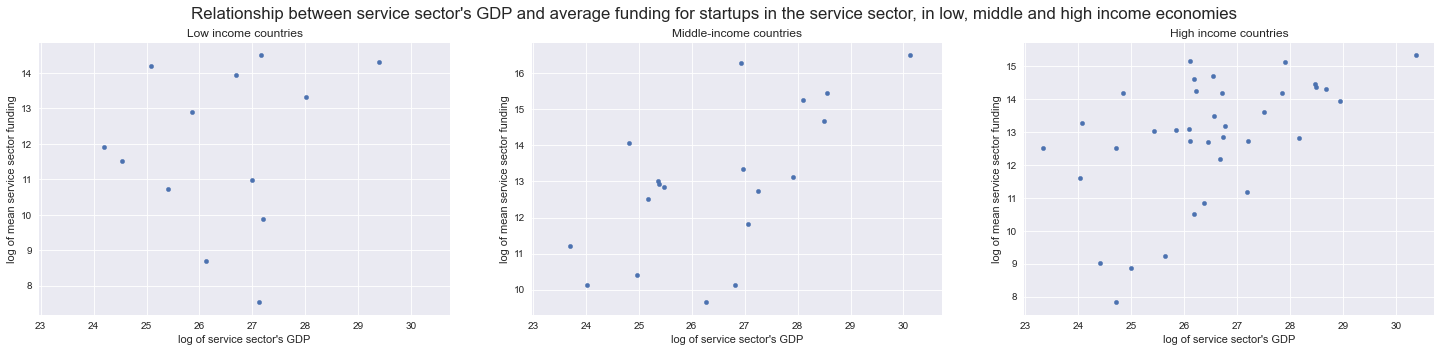

In [110]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(25,5))
plt.style.use('seaborn')

df_serv_low = dfserv[dfserv["country_code"].isin(low_incomes)]
df_serv_low.plot(ax=axes[0], x='log of service sector\'s GDP', y='log of mean service sector funding', kind='scatter')
axes[0].set_title('Low income countries')

df_serv_mid = dfserv[dfserv["country_code"].isin(mid_incomes)]
df_serv_mid.plot(ax=axes[1], x='log of service sector\'s GDP', y='log of mean service sector funding', kind='scatter')
axes[1].set_title('Middle-income countries')

df_serv_high = dfserv[dfserv["country_code"].isin(high_incomes)]
df_serv_high.plot(ax=axes[2], x='log of service sector\'s GDP', y='log of mean service sector funding', kind='scatter')
axes[2].set_title('High income countries')

fig.suptitle('Relationship between service sector\'s GDP and average funding for startups in the service sector, in low, middle and high income economies')

The panels above show how the relationship between the average funding that startups in a country's service sector receive and the GDP generated by the service sector in that country differs in low, middle and high income economies. The scatterplots, as well as individual OLS regressions show once again that the relationship is strongest and most significant for middle income economies, and fades away in low and high income economies. I therefore only present the regression output for middle income countries below:

$$
\log(\text{average funding for a service-sector startup in a middle income country}) = \beta_0 + \beta_1 \log(\text{service sector's GDP}) + \epsilon
$$

In [111]:
regserv2 = sm.OLS(endog=df_serv_mid['log of mean service sector funding'], 
                  exog=df_serv_mid[['const', 'log of service sector\'s GDP']], missing='drop')
resultsserv2 = regserv2.fit()
print(resultsserv2.summary())

                                    OLS Regression Results                                    
Dep. Variable:     log of mean service sector funding   R-squared:                       0.409
Model:                                            OLS   Adj. R-squared:                  0.375
Method:                                 Least Squares   F-statistic:                     11.79
Date:                                Sat, 16 Apr 2022   Prob (F-statistic):            0.00317
Time:                                        12:15:09   Log-Likelihood:                -35.289
No. Observations:                                  19   AIC:                             74.58
Df Residuals:                                      17   BIC:                             76.47
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                                  coef    std err 

The OLS regression suggests that in a middle-income economy, more than 40% of the variations in the mean funding for startups in the service sector can be explained by variations in that country's service sector's GDP. More specifically, a 1% increase in a middle-income country's service sector GDP corresponds to 0.78% more funding for startups in the service sector in that country on average. These results are significant at a 1% level. Finally, AIC and BIC fall comparing to the original model that combined coutnries of all income groups in one regression, suggesting that service sector's GDP is a better explanator for average service-sector startup funding for middle-income economies.

### Preferred regressions and answering the research question

From the constructed regression models, the strongest one is model 1.3, which shows how the average funding of startups in a high income country chnage with the GNI per capita of that country. This model predicts an economically significant increase of 2.1% in average funding of startups in a high income country with a 1% increase in the income level in that country, as denoted by GNI per capita. Furthermore, changes in GNI per capita explain 45% of variations in average funding for startups, and the results are statistically significant at a 1% level. This model has one of the lowest AIC and BIC scores (suggesting parsimoniousness in the model) and the highest F-Statistic amongst all other models. This is also a strong model from an economic point of view. Firstly, most startups are clustered in high income countries, and venture capital activity is also highest in those countries. Therefore, a statistically strong model that explains the funding for startups in high income countries specifically is still of high value to many entrepreneurs. Secondly, the model is generalisable to all categories and industries within a high income country.

For middle income countries specifically, models 2.1.2 and 2.2.2 explain average startup fundings best. It appears that for middle income economies, average funding for startups do not correspond well to the income level in that country, but they change with changes in the income level of the specific sector they are in within that country - namely the service and industrial sectors. This may be explained by the development of specific and distinct networks and corporate relationships in the industrial and service sectors in middle-income economies, as opposed to high income economies. Middle-income economies in East Asia, like China and Malaysia, have historically been hosts to offshore-outsourced functions which were predominantly industrial, such as hardware, web, search and ecommerce. As a result of this historical difference in the development of the industrial sector and its infrastructure in middle income countries, it is therefore likely that the networks in these industries have grown in separate directions, and not integrated much. It is therefore more intuitive to analyze changes in average startup fundings against measures of sectoral income, rather than national income levels.

The mentioned models suggest that in middle income countries, for both the industrial and service sector, changes in that sector's income (as measured by GDP of that sector) explain more than 40% of the variations in the average startup funding levels within that sector, and the results are statistically significant at a 1% level. Given the systematically high everage startup fundings in middle income countries, providing models that specifically explain funding patterns in middle income economies may also be of great value to many entrepreneurs.

Finally, no model could explain the funding level for startups in low income economies. This may be as a result of infrequent startup establishment in those countries, and lack of venture fund activity in low income countries. In fact, the average venture fund for startups in many low income countries was 0 - indicating no venture capital activity in that country. Hence, even if a model did explain variations in venture capital funding in low income economies, it would likely be of small use to entrepreneurs, as low-income countries have been unpopular locations for startup establishents, and venture capital firms operate much less in those regions. Future research could look into developing models that explain factors that affect kinds of funding in low income countries.

### Machine Learning

In the previous part (OLS regressions), as I progressed through my analysis to improve the accuracy of my model, I chose both the independent variable that I wanted to split (GNI per capita), and the threshholds on which I wanted to split - same thresholds as I used previously to classify countries into low, middle and high income levels based on their GNI per capita. In this section, I use a regression tree to make this decision optimally:

$$
\min_{j,s} \left[  \sum_{i: x_{i,j} \leq s, x_i \in R1}
    (y_i - \hat{y}_{R1})^2 +  \sum_{i: x_{i,j} > s, x_i \in R2}
    (y_i - \hat{y}_{R2})^2 \right]
$$

The regression tree will iteratively choose the independent variables and threshholds that minimize the mean squared error most. That is, given the independent variables in the dataframe, the regression tree provides the most accurate model to predict the dependent variable - a startup's funding. The independent variables used in this regression include the startup country's GNI per capita, industrial sector GDP and service sector GDP, as well as a dummy variable indicating whether the startup's category falls under the industrial sector (1) or service sector (0). Finally, I present the dependent variable - startup's funding - in logarithmic scale as there is a large positive skew that needs to be accounted for. Notice that the dependent variable here, unlike in my OLS regressions, is the funding of an individual startup rather than the average funding for startups in a given country or its sector. Furthermore, the data includes only the startups that have a funding greater than 0 (for scaling purposes), and fall under the categories we classified within the industrial sector and service sector.

The parameter used for regularization in this regression will simply be the depth of the tree: by setting a maximum depth number, we ensure that the tree does not grow to include more parameters than it should, thus avoiding over-fitting. It is important to recognise that there will be random errors and many other variables beyond the scope of this study that impact the funding of a particular stratup. Through regularization, we ensure that the model does not reduce the mean squared error term too much to explain the variations that are due to chance, and not the actual change in our independent variables. Due to these reasons, and to avoid complexity, we set the maximum depth to 3 layers. Adding more layers to the regression beyond this point does not produce intuitive results that can be generalizable to the largest number of startups, and the MSE does not decrease noticably.

In [116]:
from sklearn import tree

temporary_df = pd.merge(gdp_by_sector, df_GNI, right_on='country_code', left_on='iso_a3', how='inner')
temporary_df = temporary_df.drop(['country'], axis=1)
temporary_df['service_gdp_mil_USD'] = 1000000*(temporary_df['service_gdp_mil_USD'])
temporary_df['industrial_gdp_mil_USD'] = 1000000*(temporary_df['industrial_gdp_mil_USD'])
temporary_df.rename(columns={'2020': 'GNI_per_capita', 'industrial_gdp_mil_USD': 'industrial_gdp',
                             'service_gdp_mil_USD': 'service_gdp'}, inplace=True)


dftree = pd.DataFrame(file)[['entity_type','category_code', 'country_code', 'funding_total_usd']]
dftree = dftree[dftree.entity_type == 'Company']
dftree = dftree[dftree.funding_total_usd > 0]
dftree = dftree.dropna()
dftree = pd.merge(dftree, temporary_df, on='country_code')

# making a dummy for whether startup is in industrial or service sector:
for row in dftree.index:
    if dftree['category_code'][row] in industrials:
        dftree['category_code'][row] = 1
    elif dftree['category_code'][row] in services:
        dftree['category_code'][row] = 0
    else:
        dftree = dftree.drop([row])
        
dftree.rename(columns={'category_code': 'in_industrial'}, inplace=True)

In [117]:
from sklearn import metrics

y = np.log(dftree["funding_total_usd"])   
dftree = dftree.drop(['entity_type', 'country_code', 'funding_total_usd'], axis=1)
X = dftree

funding_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X,y)
y_pred_tree = funding_tree.predict(X)

In [118]:
r13 = results13.mse_total
r212 = resultsind2.mse_total
r222 = resultsserv2.mse_total
m = metrics.mean_squared_error(y, y_pred_tree)

print('========================= MSE Comparisons =========================\n')
print('Mean Squared Error for Regression Tree model:   ', m)
print('Mean Squared Error for OLS model 1.3:           ', r13)
print('Mean Squared Error for OLS model 2.1.2:         ', r212)
print('Mean Squared Error for OLS model 2.2.2:         ', r222)

========================= MSE Comparisons =========================

Mean Squared Error for Regression Tree model:    4.402686591239705
Mean Squared Error for OLS model 1.3:            3.5631123553125637
Mean Squared Error for OLS model 2.1.2:          7.0656426521199664
Mean Squared Error for OLS model 2.2.2:          4.295354340699505


As presented above, the mean squared error of prediction for the regression tree is larger than that of both model 1.3 and model 2.2.2. This suggests that the algorithm, given the 4 independent variables (startup's country's GNI per capita, industrial sector GDP and service sector GDP and the sector of the startup) and the maximum depth permitted (3), cannot determine a startup's funding as accurately as OLS models 1.3 and 2.2.2.

Notice again that the models above are different from the regression tree in their dependent variables: they use mean startup fundings for their given country and mean sectoral fundings for a given sector in a given country. This should be considered when evaluating the accuracy of those models against the regression tree.

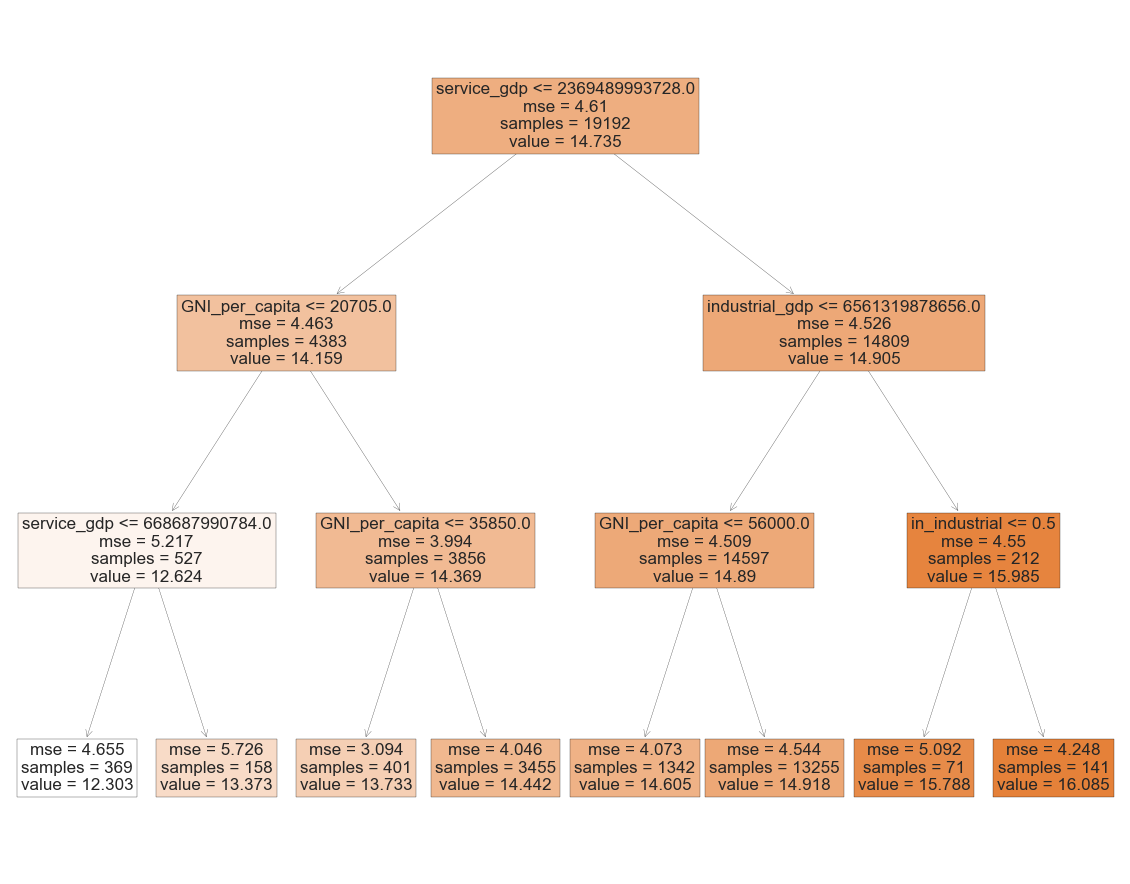

In [119]:
fig = plt.figure(figsize=(20,16))
fig = tree.plot_tree(funding_tree, feature_names=X.columns, fontsize=17, filled=True)

#### Results

The regression tree has chosen the service sector's GDP as the top most indicator of a startup's funding. This is in fact quite intuitive, as venture capital firms themselves fall within the service sector, and there is some proportionality between their earnings (both management fees and carried interest) - that is, to make a revenue, a venture capital firm has to invest. If venture capital revenues contribute to a significant enough proportion of the service sector's GDP and this intuition is correct, this represents an endogeneity problem that future work can address. 

Next, for the smaller side of the threshhold (where the service sector's GDP is smaller than roughly 2,369,500,000,000 dollars, the tree splits based on GNI per capita, using the threshhold of 20,705 dollars, which already falls much abpve the minimum threshhold for being classified as a high income country - i.e., high income coutnries fall both to the left and right branches of this tree. The smaller side of this threshhold is once again split based on service GDP, possibily separating the observations in countries with less venture capital activity. The larger side of the threshhold splits on an even higher GNI per capita of 35,850 dollars.

Where the service sector's GDP is larger than 2,369,500,000,000 dollars, the tree next classifies the data based on startup's ocuntry's industrial sector's GDP. If the industrial sector's GDP is smaller than about 6,561,300,000,000 dollars, the tree once again splits the data based on the industrial sector's GDP, using a threshhold of around 2,950,800,000,000 dollars this time. For observations where the industrial sector's GDP is larger than the orignal threshhold of 6,561,300,000,000 dollars, the model finally splits observations based on which sector the startup falls into. The highest funding is thus predicted for startups in countries with a service sector GDP higher than 2,369,500,000,000 dollar, an industrial sector GDP higher than 6,561,300,000,000 dollars, and in the industrial sector.


#### Comparison

The regression tree consistently chooses very large threshholds for GNI per capita and sectoral GDPs at the given depth, and thus, focuses more closely on high income economies, as we did with OLS regressions. The tree however uses threshholds that cound not have been determined easily using OLS regressions. For example, I split my data using threshholds that classify countries into low, middle or high income, but the regression tree discovered specific threshholds that are statistically stronger turning points for explaining differences in startup fundings. While there may be advantages to having more precise threshholds for sub-sectioning the independent variables, as is the case with the regression tree, it is important to consider the interpretability and application benefits of using the standard threshholds used internationally, such as the GNI per capita threshholds we used for separating countries into low, middle and high income.

Furthermore, the tree successfully identifies and ranks the most important independent variables to split on at each internal node. Recall that with OLS regressions, I used a combination of theoretical hypotheses and some trial and error in order to achieve a narrow enough model to explain startup funding levels - I removed middle income and low income countries to improve the model developed in OLS regression set 1, and focused on middle income economies in OLS regression set 2. This means that the OLS method could only provide insight on the relationship between the independent variables (and sub-sections of them) that I had chosen to analyse, but would not reflect relationships that I had not considered before. For example, the tree identified a country's service sector's GDP as the top-most explanator of startup fundings in that country. As discussed above, there may be an economic explanation for this, linking venture capital firm's income, which contributes to the service sector's income, to how much venture capital firms invest in startups. This is particularly important for reducing endogeneity biases if aiming to establish causality in future studies.

## Conclusion

This paper aimed to investigate whether the location and the sector (industrial or service) of a startup, separately or in conjugation with one another, correspond to systematic differences in venture capital fundings of startups, and if so, what are these differences. To answer this question, we described both the country and the sector in which a startup falls in terms of the income generated in that sphere. More precisely, GNI per capita was used for describing income levels in countries – which also allowed for the classification of these locations to low-, middle- and high-income countries – and sectoral GDP was used to define the income generated by the sector in which the startup operates. 

We discovered that there indeed are differences between average funding levels for startups, based on the income level of the country that they are located in, although this relationship is not consistent across low-, middle- and high-income countries. For startups in high income countries, there is a positive, linear association between income level of the country they are situated in, and the amount of funding they receive. Simply put, for startups in high-income countries, as the income level of their country increases, so do their fundings. While this aligns with macroeconomic theories that explain investment as a function of income, where a rise in income affects investment levels positively, we cannot establish such causal effect at this stage of analysis. For instance, it could indeed be possible that higher investments are contributing to economic growth, and thus, resulting in larger income levels. 
    
For middle-income economies, this exact relationship does not hold. A better way to model the variations in average startup fundings in such economies is by explaining these differences based on the income level of the sector that they are in, rather than the country as a whole. We discovered that for startups in the industrial sector, higher GDP in the industrial sector corresponds to higher funding levels. Similarly, for firms in the service sector, higher GDP in the service sector corresponds to higher funding levels. This may be explained by a combination of historically different developments of sectors as a result of hosting industrial offshore-outsourced functions and the tendency of venture capital firms to base funding decisions on existing rapports and relationships. It is important to consider the potential endogeneity bias when using service sector’s GDP for explaining startup’s income, as venture capital firms’ earnings, which are arguably proportional to their investments, contribute to the service sector’s income.  Finally, in low-income countries, no significant relationship exists between income levels in a startups country or sector of operation. This may be due to the lower level of venture capital activity and weak startup culture in low-income countries, which are reflected through the fact that many low-income countries have venture capital funding for their startups. 

While past literatures had focused heavier on the importance of capturing venture capital funding for early-stage startups, this paper explains how country-wide and sectoral income levels could hinder or increase a startup’s venture capital funding amount, which is more valuable to entrepreneurs. Particularly, this paper develops models that give specific insight into funding levels for startup, based on whether they are situated in high- or low-income countries, which have been more popular locations to startups in the past. This study also adds to past literature on the differences between venture capital firms’ valuations and investments in the West and East by providing the implications of those differences (Miloud, 2012): we suggest that in middle-income economies, which largely overlap with East Asian hubs for startups, funding levels for startups tend to be more correlated with the income level of their sector that with the overall income levels in their country.

Future studies or replications of this study could address the mentioned endogeneity problems in an effort to establish a causal effect. Furthermore, they could benefit from categorising startups into sectors more carefully and scientifically to ensure than each startup’s funding is in fact being compared against the relevant GDP. Alternatively, researchers could collect income data specific to individual industries (rather than sectors) to ensure this consistency. The latter would perhaps yield more accurate results, as networks of investors and entrepreneurs may be stronger in these narrower categories, and generated income levels would be more accurate determinants of funding decisions.  Finally, future research could also work towards developing models that explain funding levels in low-income countries. Given the small frequency of startup establishments in low-income countries, and lack of considerable venture capital activity, this may currently be of low significance. However, with such considerable prospect of growth for startups across the world, such results will eventually be of high economic significance to entrepreneurs.